In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
df =pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: ylabel='Density'>

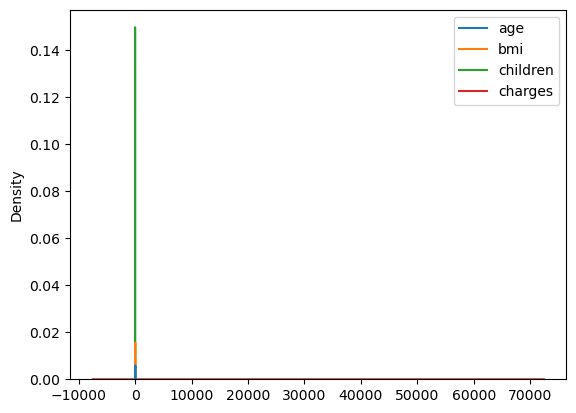

In [3]:
sns.kdeplot(df)

<Axes: >

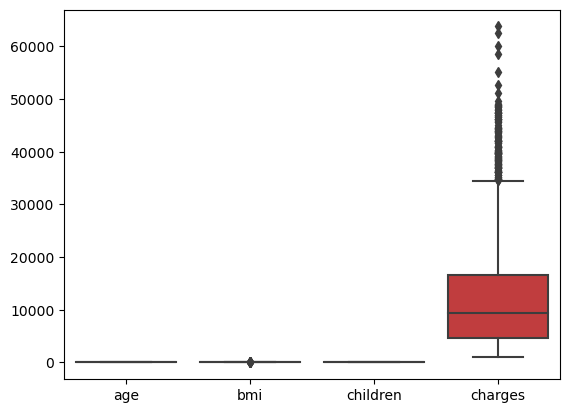

In [4]:
sns.boxplot(df)

<Axes: xlabel='bmi'>

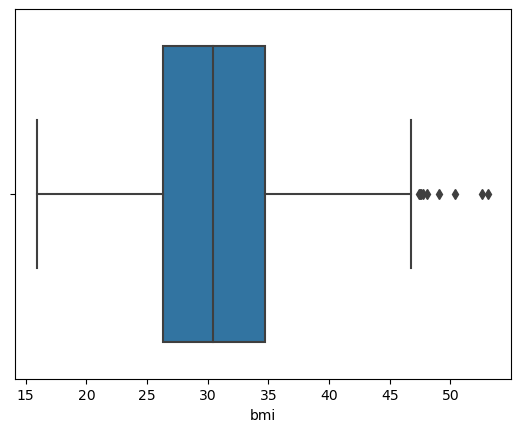

In [5]:
sns.boxplot(x=df["bmi"])

<Axes: xlabel='bmi', ylabel='Density'>

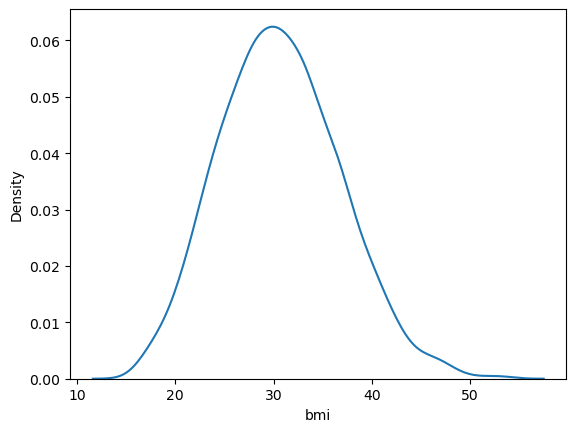

In [6]:
sns.kdeplot(df["bmi"])

In [7]:
outliers = stats.zscore(df["bmi"])
thresh = 2.7
np.where(outliers>thresh)

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [8]:
upper_tail = df["bmi"].mean() + 2.7 * df["bmi"].std()
lower_tail = df["bmi"].mean() - 2.7 * df["bmi"].std()

In [9]:
df["bmi"] = np.where(df["bmi"]>upper_tail,upper_tail,np.where(df["bmi"]<lower_tail,lower_tail,df["bmi"]))

<Axes: xlabel='bmi'>

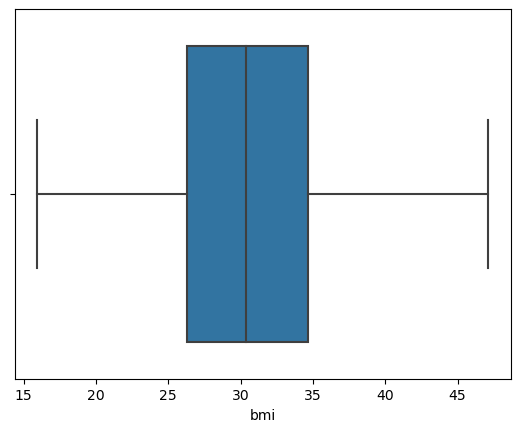

In [10]:
sns.boxplot(x=df["bmi"])

<Axes: xlabel='charges'>

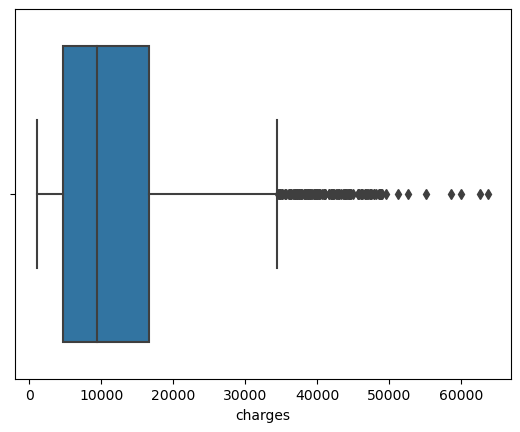

In [11]:
###column charges
sns.boxplot(x=df["charges"])

In [12]:
sc = StandardScaler()

In [13]:
df["charges"]= sc.fit_transform(df[["charges"]])
df["charges"]

0       0.298584
1      -0.953689
2      -0.728675
3       0.719843
4      -0.776802
          ...   
1333   -0.220551
1334   -0.914002
1335   -0.961596
1336   -0.930362
1337    1.311053
Name: charges, Length: 1338, dtype: float64

<Axes: xlabel='charges'>

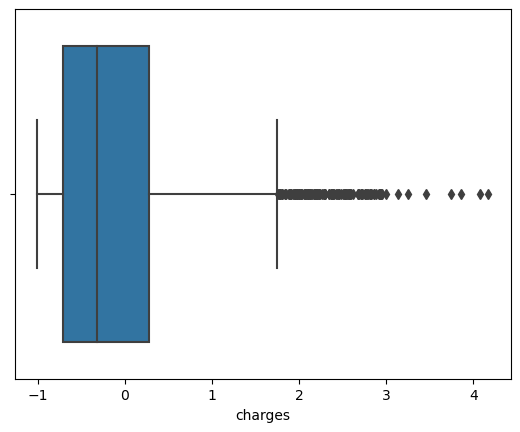

In [14]:
sns.boxplot(x = df["charges"])

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1.338000e+03
mean,39.207025,30.648947,1.094918,-8.098488e-17
std,14.049960,6.053953,1.205493,1.000374e+00
min,18.000000,15.960000,0.000000,-1.003557e+00
25%,27.000000,26.296250,0.000000,-7.046504e-01
50%,39.000000,30.400000,1.000000,-3.212089e-01
75%,51.000000,34.693750,2.000000,2.783441e-01
max,64.000000,47.128502,5.000000,4.171663e+00


In [16]:
outliers = stats.zscore(df["charges"])
thresh = 3
np.where(outliers>thresh)

(array([  34,  543,  577,  819, 1146, 1230, 1300], dtype=int64),)

In [17]:
upper_tail = df["charges"].mean() + 1.7* df["charges"].std()
lower_tail = df["charges"].mean() - 1.7* df["charges"].std()

In [18]:
df["charges"] = np.where(df["charges"]>upper_tail,upper_tail,df["charges"])

<Axes: xlabel='charges'>

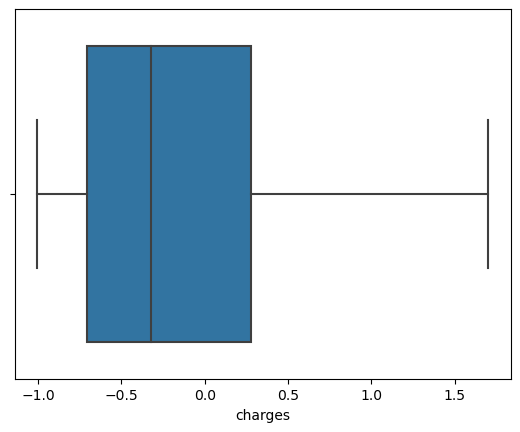

In [19]:
sns.boxplot(x=df["charges"])

In [20]:
#sex_column
df['sex'].replace({'female':0,'male':1},inplace = True)

In [21]:
#smoker_column
df['smoker'].replace({'no':0,'yes':1},inplace = True)


In [22]:
df["region"]

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [23]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [25]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.648947,1.094918,0.204783,-0.070920
std,14.049960,0.500160,6.053953,1.205493,0.403694,0.827113
min,18.000000,0.000000,15.960000,0.000000,0.000000,-1.003557
25%,27.000000,0.000000,26.296250,0.000000,0.000000,-0.704650
50%,39.000000,1.000000,30.400000,1.000000,0.000000,-0.321209
75%,51.000000,1.000000,34.693750,2.000000,0.000000,0.278344
max,64.000000,1.000000,47.128502,5.000000,1.000000,1.700636


In [26]:
df =pd.concat([df,pd.get_dummies(df["region"])],axis=1)
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,0.298584,0,0,0,1
1,18,1,33.770,1,0,southeast,-0.953689,0,0,1,0
2,28,1,33.000,3,0,southeast,-0.728675,0,0,1,0
3,33,1,22.705,0,0,northwest,0.719843,0,1,0,0
4,32,1,28.880,0,0,northwest,-0.776802,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,-0.220551,0,1,0,0
1334,18,0,31.920,0,0,northeast,-0.914002,1,0,0,0
1335,18,0,36.850,0,0,southeast,-0.961596,0,0,1,0
1336,21,0,25.800,0,0,southwest,-0.930362,0,0,0,1


In [27]:
df = df.drop("region",axis = 1)
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0.298584,0,0,0,1
1,18,1,33.770,1,0,-0.953689,0,0,1,0
2,28,1,33.000,3,0,-0.728675,0,0,1,0
3,33,1,22.705,0,0,0.719843,0,1,0,0
4,32,1,28.880,0,0,-0.776802,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,-0.220551,0,1,0,0
1334,18,0,31.920,0,0,-0.914002,1,0,0,0
1335,18,0,36.850,0,0,-0.961596,0,0,1,0
1336,21,0,25.800,0,0,-0.930362,0,0,0,1


In [28]:
df= df.select_dtypes(exclude=object)
x=df.drop("charges",axis = 1)
y =df["charges"]

In [29]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=80)

In [30]:
x_train

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
1155,36,0,22.135,3,0,1,0,0,0
551,32,0,28.930,0,0,0,0,1,0
484,48,1,34.300,3,0,0,0,0,1
681,19,1,20.300,0,0,0,0,0,1
73,58,1,32.010,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
522,51,0,33.915,0,0,1,0,0,0
211,40,1,30.875,4,0,0,1,0,0
934,32,1,37.180,2,0,0,0,1,0
1212,18,1,21.470,0,0,1,0,0,0


In [31]:
lr =LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([ 1.13708214e+00, -8.46813588e-03, -6.99874138e-01, -5.57175295e-01,
       -7.32316636e-01, -8.26769874e-01, -3.14388380e-01,  1.17222235e+00,
       -1.57588068e-01, -1.09162648e-01, -4.11237357e-01,  2.55113668e-01,
       -2.47312362e-01,  1.38007217e+00, -1.19036337e-01, -2.83840427e-01,
       -8.65501650e-01,  8.20118642e-01, -1.81666322e-01, -5.58591019e-01,
       -4.93815746e-01,  1.21652782e+00,  1.24110061e+00, -1.37847788e-01,
       -1.58915464e-01, -1.59588763e-02,  9.01964730e-01, -7.61724156e-01,
       -1.37528594e-01, -2.30459738e-01, -6.52848832e-01, -8.17301089e-01,
       -2.69905402e-01, -7.31178198e-01, -2.81472796e-01, -3.44581389e-01,
       -9.40316164e-01,  1.26466788e+00, -6.76650276e-01, -8.23082118e-01,
        7.01379075e-01,  1.39917130e+00, -8.33807258e-01,  1.65808145e+00,
       -1.75429508e-01, -3.50250662e-01, -2.27429854e-01, -3.54710740e-01,
       -6.39769240e-02,  9.52157958e-01,  1.18712142e-01, -1.83960801e-01,
       -5.79386335e-01,  

In [34]:
test_result = pd.DataFrame({"actual":y_test,"predicted":y_pred_test})
test_result

,actual,predicted
240,1.700636,1.137082
651,-0.222272,-0.008468
761,-0.896574,-0.699874
836,-0.732576,-0.557175
1147,-0.909410,-0.732317
...,...,...
1218,1.700636,1.366722
989,0.107511,0.818660
150,-0.672853,-0.569881
317,-0.234221,-0.081547


In [35]:
mse = mean_squared_error(y_test,y_pred_test)

rmse =np.sqrt(mse)

mae = mean_absolute_error(y_test,y_pred_test)

r2 = r2_score(y_test,y_pred_test)

print("mean squared error : ",mse)
print("root mean square error : ",rmse)
print("mean absolute error : ",mae)
print("r2_score : ",r2)

mean squared error :  0.1704437978171945
root mean square error :  0.41284839568199183
mean absolute error :  0.2754688218441181
r2_score :  0.7512053268412584


In [36]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([-0.46213687, -0.6056613 , -0.18473389, ..., -0.41918003,
       -0.9296916 , -0.65257886])

In [37]:
train_result = pd.DataFrame({"actual":y_train,"predicted":y_pred_train})
train_result

,actual,predicted
1155,-0.499130,-0.462137
551,-0.768040,-0.605661
484,-0.306257,-0.184734
681,-0.993613,-1.054354
73,-0.109355,-0.061774
...,...,...
522,-0.281205,-0.097850
211,-0.421933,-0.261046
934,-0.710176,-0.419180
1212,-0.955597,-0.929692


In [38]:
mse = mean_squared_error(y_pred_train,y_train)

rmse =np.sqrt(mse)

mae = mean_absolute_error(y_pred_train,y_train)

r2 = r2_score(y_pred_train,y_train)

print("mean squared error : ",mse)
print("root mean square error : ",rmse)
print("mean absolute error : ",mae)
print("r2_score : ",r2)

mean squared error :  0.17396293555589198
root mean square error :  0.417088642324257
mean absolute error :  0.2729176942713036
r2_score :  0.6584026100121723


# lasso

In [39]:
import pickle

with open ("Medical_Insurance_Model.pkl","wb") as f:
    pickle.dump(lr,f)

# Testing on a single row

In [40]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,1.0
northeast,0.0
northwest,0.0
southeast,0.0
southwest,1.0


In [41]:
#1
age = 19   
sex = "female"
bmi = 27.900
children = 0
smoker ="yes"
region = 'southwest'


In [42]:
#2
test_array = np.zeros(len(x_train.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
#3

label_encoded_data = {"sex":{'female':0,'male':1},
                      "smoker":{'no':0,'yes':1}}
label_encoded_data

{'sex': {'female': 0, 'male': 1}, 'smoker': {'no': 0, 'yes': 1}}

In [45]:
#4

label_encoded_data["sex"][sex]

0

In [46]:
#5

label_encoded_data["smoker"][smoker]

1

In [47]:
#6

test_array[0] = age
test_array[1] = label_encoded_data["sex"][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = label_encoded_data["smoker"][smoker]
#test_array[5] = region

In [48]:
test_array

array([19. ,  0. , 27.9,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ])

In [49]:
#7 for region index


region

'southwest'

In [50]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [51]:
region_index =np.where(column_names == region)[0]
region_index

array([8], dtype=int64)

In [52]:

test_array[region_index] = 1
test_array

array([19. ,  0. , 27.9,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ])

In [53]:
test_array

array([19. ,  0. , 27.9,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ])

In [54]:
lr.predict([test_array])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.72471581])

In [59]:

project_data = {"sex":{'female':0,'male':1},
                      "smoker":{'no':0,'yes':1},
               "columns":list(x.columns)}
project_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'no': 0, 'yes': 1},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'northeast',
  'northwest',
  'southeast',
  'southwest']}

In [58]:
with open("project_data.json","w") as f:
    json.dump(project_data,f)

In [57]:
import json
import pickle

In [68]:
with open("medical_insurance.pkl","wb") as f:
    pickle.dump(lr,f)